In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from mlxtend.preprocessing import minmax_scaling

nba_df = pd.read_csv('raw_data_p.csv')
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,10.3740,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [2]:
not_usa = nba_df.iloc[:, 7] == 'USA'
nba_df = nba_df.loc[not_usa]
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,12838,Joe Wieskamp,TOR,23,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.9630,0.000,0.068,0.115,0.321,0.083,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [3]:
nba_df = nba_df.drop(nba_df.columns[:12], axis = 1)
nba_df = nba_df.drop(nba_df.columns[4:6], axis = 1)
nba_df = nba_df.drop(nba_df.columns[-3:], axis = 1)
nba_df

,pts,reb,ast,net_rating,usg_pct
0,3.9,1.5,2.4,2.5938,0.169
1,3.8,1.3,0.3,3.9148,0.174
2,8.3,6.4,1.9,3.7550,0.175
3,10.2,2.8,1.7,5.5812,0.206
4,2.8,1.7,0.3,2.1990,0.195
...,...,...,...,...,...
12838,1.0,0.4,0.3,1.9630,0.115
12840,2.4,0.9,0.6,3.8004,0.102
12841,13.1,6.5,1.2,6.1936,0.168
12842,3.4,4.7,0.5,2.5348,0.074


In [4]:
nba_df.head(0)

,pts,reb,ast,net_rating,usg_pct


In [5]:
missing_values = nba_df.isnull().sum()
missing_values

pts           0
reb           0
ast           0
net_rating    0
usg_pct       0
dtype: int64

In [6]:
print(max(nba_df['pts']))
print(min(nba_df['pts']))
print(max(nba_df['ast']))
print(min(nba_df['ast']))
print(max(nba_df['reb']))
print(min(nba_df['reb']))
print(max(nba_df['usg_pct']))
print(min(nba_df['usg_pct']))

36.1
0.0
11.7
0.0
16.3
0.0
1.0
0.0


**SCALING DATA**

In [7]:
nba_df.describe()

,pts,reb,ast,net_rating,usg_pct
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.200392,3.440575,1.847719,4.340032,0.184798
std,6.046752,2.392808,1.813861,1.995526,0.053896
min,0.000000,0.000000,0.000000,0.238400,0.000000
25%,3.600000,1.700000,0.600000,2.879400,0.149000
50%,6.700000,2.900000,1.200000,4.045200,0.181000
75%,11.500000,4.600000,2.500000,5.558200,0.218000
max,36.100000,16.300000,11.700000,12.282600,1.000000


In [8]:
scaler = StandardScaler()
Znormalized_nba = scaler.fit_transform(nba_df)
print(Znormalized_nba)

[[-0.71122358 -0.81104082  0.30449216 -0.87511443 -0.29314004]
 [-0.72776216 -0.89462852 -0.85331345 -0.21310271 -0.20036501]
 [ 0.01647379  1.23685782  0.02882416 -0.29318558 -0.18181   ]
 ...
 [ 0.81032546  1.27865167 -0.35711104  0.9289051  -0.31169505]
 [-0.79391646  0.52636237 -0.74304624 -0.90468195 -2.05586577]
 [-0.29775917  0.06663002 -0.52251184 -0.86509154 -0.29314004]]


In [9]:
min_max_scaler = MinMaxScaler()
Znormalized_nba_minmax = min_max_scaler.fit_transform(nba_df)
print(Znormalized_nba_minmax)

[[0.10803324 0.09202454 0.20512821 0.19556301 0.169     ]
 [0.10526316 0.0797546  0.02564103 0.30524236 0.174     ]
 [0.2299169  0.39263804 0.16239316 0.29197456 0.175     ]
 ...
 [0.36288089 0.39877301 0.1025641  0.49444546 0.168     ]
 [0.09418283 0.28834356 0.04273504 0.19066439 0.074     ]
 [0.17728532 0.2208589  0.07692308 0.19722356 0.169     ]]


In [10]:
Znormalized_nba_df = pd.DataFrame(Znormalized_nba, columns = nba_df.columns)
Znormalized_nba_df

,pts,reb,ast,net_rating,usg_pct
0,-0.711224,-0.811041,0.304492,-0.875114,-0.293140
1,-0.727762,-0.894629,-0.853313,-0.213103,-0.200365
2,0.016474,1.236858,0.028824,-0.293186,-0.181810
3,0.330707,-0.267721,-0.081443,0.622004,0.393395
4,-0.893148,-0.727453,-0.853313,-1.072966,0.189290
...,...,...,...,...,...
10716,-1.190842,-1.270773,-0.853313,-1.191236,-1.295110
10717,-0.959302,-1.061804,-0.687913,-0.270434,-1.536326
10718,0.810325,1.278652,-0.357111,0.928905,-0.311695
10719,-0.793916,0.526362,-0.743046,-0.904682,-2.055866


**NORMALIZATION and SCALING**

In [11]:
Znormalized_nba_minmax_df = pd.DataFrame(Znormalized_nba_minmax, columns = nba_df.columns)
Znormalized_nba_minmax_df

,pts,reb,ast,net_rating,usg_pct
0,0.108033,0.092025,0.205128,0.195563,0.169
1,0.105263,0.079755,0.025641,0.305242,0.174
2,0.229917,0.392638,0.162393,0.291975,0.175
3,0.282548,0.171779,0.145299,0.443599,0.206
4,0.077562,0.104294,0.025641,0.162784,0.195
...,...,...,...,...,...
10716,0.027701,0.024540,0.025641,0.143189,0.115
10717,0.066482,0.055215,0.051282,0.295744,0.102
10718,0.362881,0.398773,0.102564,0.494445,0.168
10719,0.094183,0.288344,0.042735,0.190664,0.074


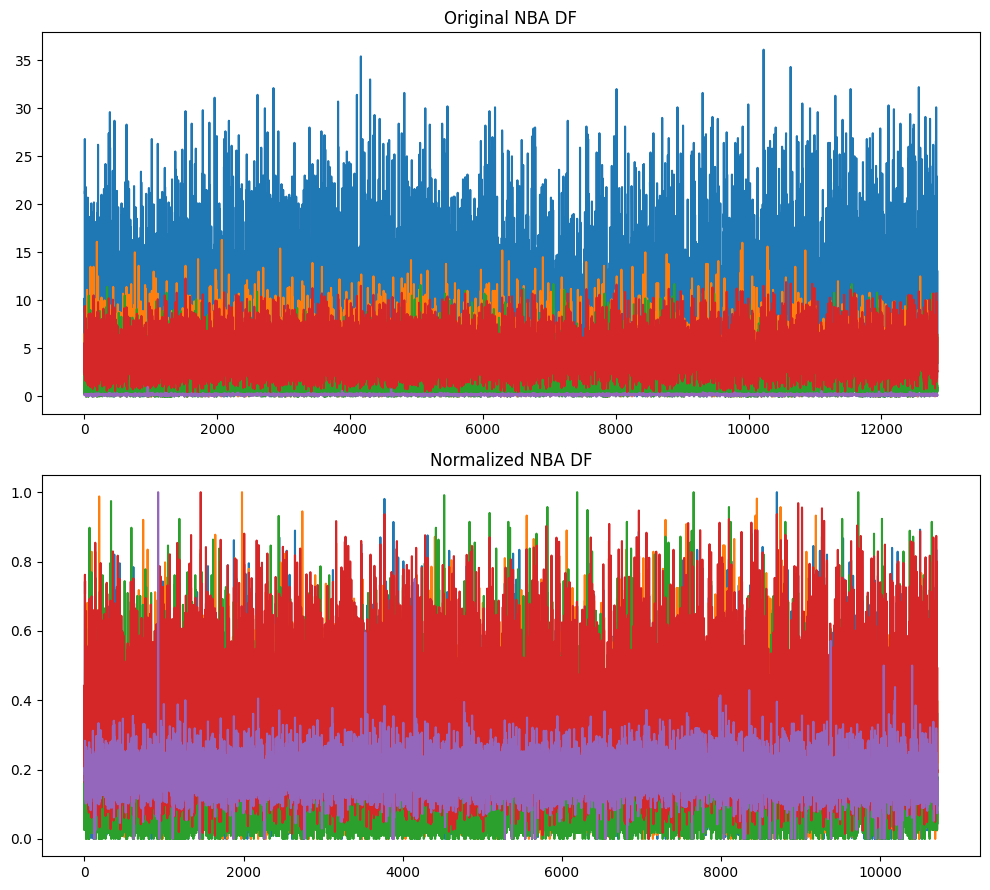

In [12]:
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 1)
plt.plot(nba_df)
plt.title('Original NBA DF')
plt.subplot(2, 1, 2)
plt.plot(Znormalized_nba_minmax_df)
plt.title('Normalized NBA DF')
plt.tight_layout()
plt.show()

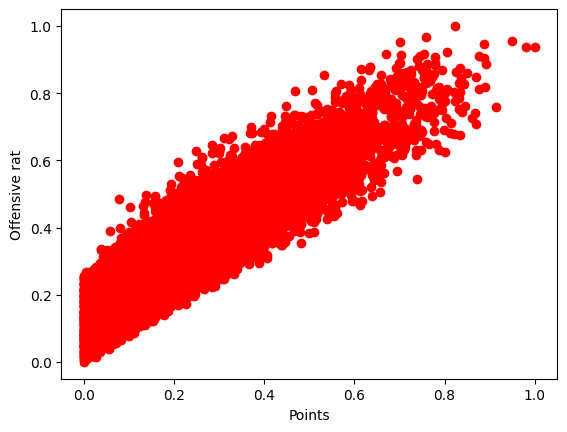

In [13]:
plt.scatter(Znormalized_nba_minmax_df.pts, Znormalized_nba_minmax_df.net_rating, color = 'red')
plt.xlabel('Points')
plt.ylabel('Offensive rat')
plt.show()

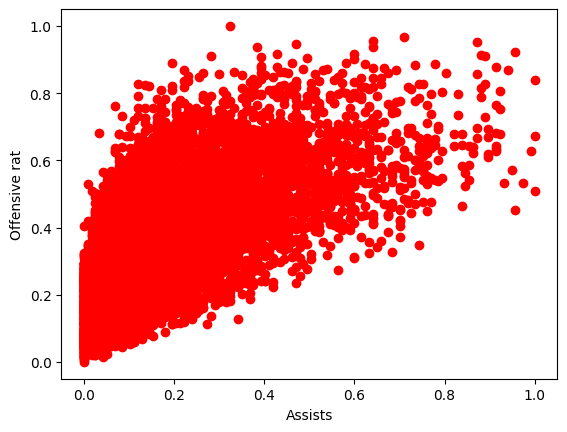

In [14]:
plt.scatter(Znormalized_nba_minmax_df.ast, Znormalized_nba_minmax_df.net_rating, color = 'red')
plt.xlabel('Assists')
plt.ylabel('Offensive rat')
plt.show()

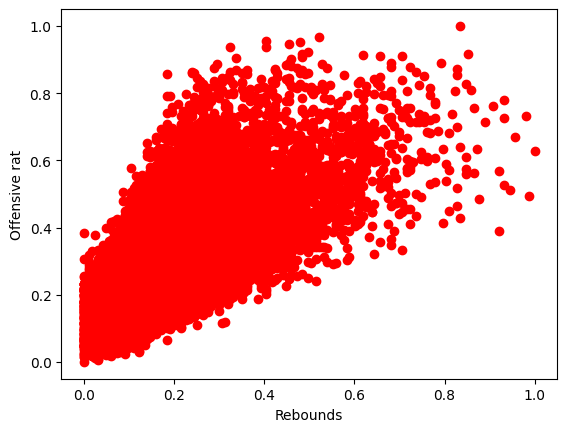

In [15]:
plt.scatter(Znormalized_nba_minmax_df.reb, Znormalized_nba_minmax_df.net_rating, color = 'red')
plt.xlabel('Rebounds')
plt.ylabel('Offensive rat')
plt.show()

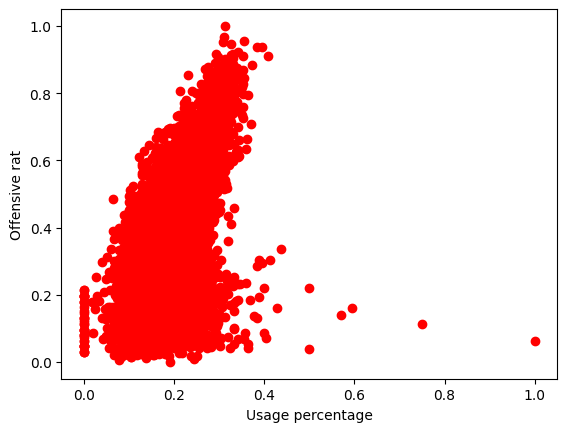

In [16]:
plt.scatter(Znormalized_nba_minmax_df.usg_pct, Znormalized_nba_minmax_df.net_rating, color = 'red')
plt.xlabel('Usage percentage')
plt.ylabel('Offensive rat')
plt.show()

**TRAINING MODEL 1**

In [17]:
part_nba_df = Znormalized_nba_minmax_df[['pts', 'ast', 'reb', 'usg_pct', 'net_rating']]
msk = np.random.rand(len(Znormalized_nba_minmax_df)) < 0.8
train = part_nba_df[msk]
LR_Model = linear_model.LinearRegression()
axis_x = np.asanyarray(train[['pts', 'reb', 'ast', 'usg_pct']])
axis_y = np.asanyarray(train[['net_rating']])
LR_Model.fit(axis_x, axis_y)

print('The coefficients are: ', LR_Model.coef_)

The coefficients are:  [[0.60663609 0.27277856 0.18429869 0.0084635 ]]


**TESTING**

In [18]:
test = part_nba_df[~msk]
axis_y_ = LR_Model.predict(test[['pts', 'reb', 'ast', 'usg_pct']])
axis_2_x = np.asanyarray(test[['pts', 'reb', 'ast', 'usg_pct']])
axis_2_y = np.asanyarray(test[['net_rating']])
mae = mean_absolute_error(axis_2_y, axis_y_)
mse = mean_squared_error(axis_2_y, axis_y_)
rmse = np.sqrt(mse)
print('The Mean absolute error is: %.7f'%mae)
print('The Mean Squared Error: %.7f'% mse)
print('The Root of Mean Squared Error is: %.7f'%rmse)
print('Sum Squares residual: %.7f' %np.mean((axis_y_ - axis_2_y)**2))
print('Variance score: %.7f' %LR_Model.score(axis_2_x, axis_2_y))
r_squared = LR_Model.score(axis_2_x, axis_2_y)
print('La r cuadrada es: ', r_squared)

The Mean absolute error is: 0.0618395
The Mean Squared Error: 0.0051168
The Root of Mean Squared Error is: 0.0715317
Sum Squares residual: 0.0051168
Variance score: 0.8097170
La r cuadrada es:  0.809716999287748


c:\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 0 with size 1

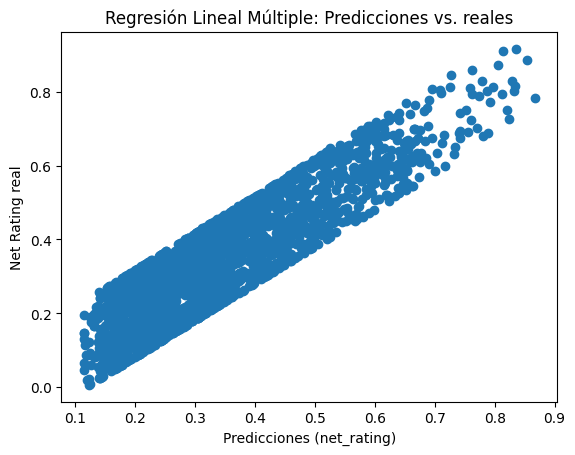

In [19]:
# Crea una figura y un eje principal
fig, ax = plt.subplots()

# Opcionalmente, puedes personalizar el título y las etiquetas de los ejes
ax.set_title("Regresión Lineal Múltiple: Predicciones vs. reales")
ax.set_xlabel("Predicciones (net_rating)")
ax.set_ylabel("Net Rating real")
ax.scatter(axis_y_, axis_2_y)
# Obtiene los coeficientes y el intercepto del modelo
coefs = LR_Model.coef_
intercept = LR_Model.intercept_

# Calcula la línea de regresión para un rango de valores de las predicciones
predicted_range = np.linspace(min(axis_y_), max(axis_y_))
fitted_line = coefs[0] * predicted_range + coefs[1] * predicted_range**2 + coefs[2] * predicted_range**3 + coefs[3] + intercept

# Grafica la línea de regresión
ax.plot(predicted_range, fitted_line, color='red')
ax.text(0.05, 0.95, f"R-cuadrado: {r_squared:.3f}", transform=ax.transAxes)

# Agrega leyendas
ax.legend(['Puntos reales', 'Línea de regresión'], loc='upper left')
plt.show()

**TRAINING MODEL 2**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
partx_nba_df = Znormalized_nba_minmax_df.drop(columns = 'net_rating')
party_nba_df = Znormalized_nba_minmax_df['net_rating']
x_train, x_test, y_train, y_test = train_test_split(partx_nba_df, party_nba_df, test_size = 0.2)
score = accuracy_score(x_test, y_test)
LR_Model.fit(x_train, y_train)
print(LR_Model.coef_)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets